# Example of RC beam optimal design

## Requirements

 - python3
 - cma python package: install via pip https://pypi.org/project/cma/#description


In [10]:
# import CMA-ES package
import cma

In [18]:
def structAnalysis(x):
    
    q = 100
    L = 1
    Moment = q * L**2.0 / 8.0
    return Moment

In [ ]:
def steelDesign(x,M):
    
    return Asp, Asn

In [12]:
def costFun(x):
    
    b = x[0]
    h = x[1]
    
    Moment = structAnalysis(x)
    
    # compute steel area
    Asp, Asn = steelDesign( x, M)
    
    # compute cost
    f = b*h + Asp + Asn
    return f

In [16]:
fun = costFun  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
x0 = [1,1]  # initial solution
sigma0 = .1    # initial standard deviation to sample new solutions

xopt, es = cma.fmin2(fun, x0, sigma0, {'bounds': [ [.2, .2], None]} )

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=740184, Fri Apr 28 13:04:40 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.892885768690984e+00 1.0e+00 9.81e-02  9e-02  1e-01 0:00.0
    2     12 2.661927598161799e+00 1.1e+00 1.50e-01  1e-01  2e-01 0:00.0
    3     18 2.466734574134933e+00 1.4e+00 2.16e-01  2e-01  3e-01 0:00.0
   77    462 2.040000000000000e+00 2.0e+00 1.76e-05  4e-08  4e-08 0:00.0
termination on tolfun=1e-11 (Fri Apr 28 13:04:40 2023)
final/bestever f-value = 2.040000e+00 2.040000e+00 after 463/393 evaluations
incumbent solution: [0.20000000000000054, 0.2000000000000009]
std deviation: [3.747615930683509e-08, 3.818641369649458e-08]


In [17]:
dict(es.result._asdict())

{'xbest': array([0.2, 0.2]),
 'fbest': 2.04,
 'evals_best': 393,
 'evaluations': 463,
 'iterations': 77,
 'xfavorite': array([0.2, 0.2]),
 'stds': array([3.74761593e-08, 3.81864137e-08]),
 'stop': {'tolfun': 1e-11}}

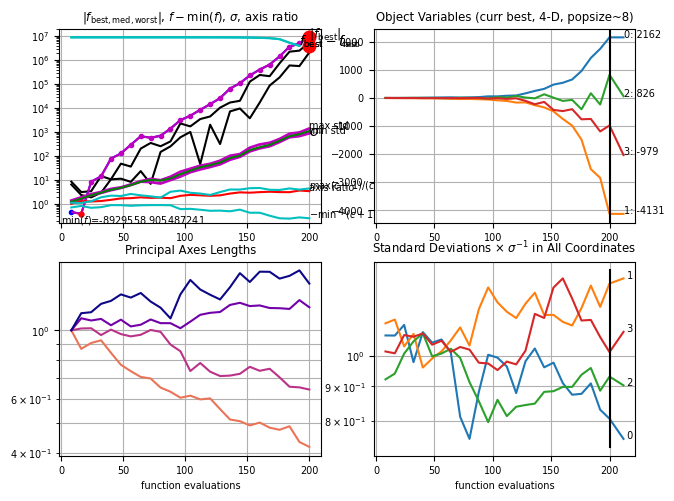

In [15]:
es.plot();